In [34]:
# import depenedencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import scipy.stats as stats

UsageError: Line magic function `%hvplot` not found.


In [49]:
# Import csv file
healthy_aging_df = pd.read_csv('Alzheimer_s_Disease_and_Healthy_Aging_Indicators__Cognitive_Decline.csv', low_memory=False)
healthy_aging_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Response,Data_Value_Unit,...,QuestionID,ResponseID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,Report
0,2015,2020,AL,Alabama,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,NaN,%,...,Q42,NaN,1,AGE,65PLUS,RACE,NAA,NaN,NaN,NaN
1,2015,2015,AL,Alabama,BRFSS,Cognitive Decline,Need assistance with day-to-day activities bec...,Percentage of older adults who reported that a...,NaN,%,...,Q41,NaN,1,AGE,5064,RACE,WHT,NaN,NaN,NaN
2,2015,2020,AL,Alabama,BRFSS,Cognitive Decline,Need assistance with day-to-day activities bec...,Percentage of older adults who reported that a...,NaN,%,...,Q41,NaN,1,AGE,AGE_OVERALL,GENDER,MALE,NaN,NaN,NaN
3,2020,2020,AK,Alaska,BRFSS,Cognitive Decline,Functional difficulties associated with subjec...,Percentage of older adults who reported subjec...,NaN,%,...,Q31,NaN,2,AGE,AGE_OVERALL,RACE,ASN,NaN,NaN,NaN
4,2020,2020,AK,Alaska,BRFSS,Cognitive Decline,Need assistance with day-to-day activities bec...,Percentage of older adults who reported that a...,NaN,%,...,Q41,NaN,2,AGE,5064,RACE,ASN,NaN,NaN,NaN


In [3]:
# get unique values for Response column
healthy_aging_df['LocationDesc'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Hawaii', 'Georgia', 'Illinois', 'Idaho', 'Indiana',
       'Kentucky', 'Kansas', 'Iowa', 'Louisiana', 'Maryland', 'Maine',
       'Massachusetts', 'Midwest', 'Michigan', 'Nebraska', 'Nevada',
       'Mississippi', 'Minnesota', 'Missouri', 'Tennessee', 'Montana',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'Northeast', 'North Dakota', 'North Carolina', 'Pennsylvania',
       'Ohio', 'Oklahoma', 'Oregon', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South', 'South Dakota', 'Texas',
       'United States, DC & Territories', 'Utah', 'Vermont', 'West',
       'Virginia', 'Washington', 'West Virginia', 'Wyoming', 'Wisconsin'],
      dtype=object)

In [4]:
# create a new dataframe with only the columns we need
clean_healthy_aging_df = healthy_aging_df[['YearStart', 'YearEnd', 'LocationDesc', 'Topic', 'Data_Value', 'StratificationID1']].copy()

# rename columns
clean_healthy_aging_df = clean_healthy_aging_df.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Percentage', 'StratificationID1': 'Age'})

# drop rows with null values
clean_healthy_aging_df = clean_healthy_aging_df.dropna()

clean_healthy_aging_df.head()

,YearStart,YearEnd,State,Topic,Percentage,Age
1,2015,2015,Alabama,Need assistance with day-to-day activities bec...,41.8,5064
2,2015,2020,Alabama,Need assistance with day-to-day activities bec...,39.3,AGE_OVERALL
5,2015,2020,Arizona,Talked with health care professional about sub...,56.6,5064
10,2015,2020,Arizona,Subjective cognitive decline or memory loss am...,11.3,AGE_OVERALL
14,2019,2019,Alabama,Functional difficulties associated with subjec...,52.3,AGE_OVERALL


In [74]:
# Isolate the data for ages 65 and older
over64_df = clean_healthy_aging_df.loc[clean_healthy_aging_df['Age'] == '65PLUS']
# Isolate the data for ages 50-64
under65_df = clean_healthy_aging_df.loc[clean_healthy_aging_df['Age'] == '5064']
# Isolate the data for ages oversll
all_ages_df = clean_healthy_aging_df.loc[clean_healthy_aging_df['Age'] == 'AGE_OVERALL']

# remove rows for unwanted states
over64_df = over64_df.loc[over64_df['State'] != 'District of Columbia']
over64_df = over64_df.loc[over64_df['State'] != 'Midwest']
over64_df = over64_df.loc[over64_df['State'] != 'Northeast']
over64_df = over64_df.loc[over64_df['State'] != 'South']
over64_df = over64_df.loc[over64_df['State'] != 'West']
over64_df = over64_df.loc[over64_df['State'] != 'United States, DC & Territories']
under65_df = under65_df.loc[under65_df['State'] != 'District of Columbia']
under65_df = under65_df.loc[under65_df['State'] != 'Midwest']
under65_df = under65_df.loc[under65_df['State'] != 'Northeast']
under65_df = under65_df.loc[under65_df['State'] != 'South']
under65_df = under65_df.loc[under65_df['State'] != 'West']
under65_df = under65_df.loc[under65_df['State'] != 'United States, DC & Territories']
all_ages_df = all_ages_df.loc[all_ages_df['State'] != 'District of Columbia']
all_ages_df = all_ages_df.loc[all_ages_df['State'] != 'Midwest']
all_ages_df = all_ages_df.loc[all_ages_df['State'] != 'Northeast']
all_ages_df = all_ages_df.loc[all_ages_df['State'] != 'South']
all_ages_df = all_ages_df.loc[all_ages_df['State'] != 'West']
all_ages_df = all_ages_df.loc[all_ages_df['State'] != 'United States, DC & Territories']

# display unique values for Topic column
all_ages_df['Topic'].unique()

array(['Need assistance with day-to-day activities because of subjective cognitive decline or memory loss',
       'Subjective cognitive decline or memory loss among older adults',
       'Functional difficulties associated with subjective cognitive decline or memory loss among older adults',
       'Talked with health care professional about subjective cognitive decline or memory loss'],
      dtype=object)

In [76]:
# replace values in Topic column
over64_df['Topic'] = over64_df['Topic'].replace({'Subjective cognitive decline or memory loss among older adults': 'Officially Diagnosed',
                                                 'Functional difficulties associated with subjective cognitive decline or memory loss among older adults': 'Experiencing Functional Difficulties', 
                                                 'Talked with health care professional about subjective cognitive decline or memory loss': 'Talked with a Doctor', 
                                                 'Need assistance with day-to-day activities because of subjective cognitive decline or memory loss': 'Assistance with Daily Living'})
under65_df['Topic'] = under65_df['Topic'].replace({'Subjective cognitive decline or memory loss among older adults': 'Officially Diagnosed',
                                                    'Functional difficulties associated with subjective cognitive decline or memory loss among older adults': 'Experiencing Functional Difficulties', 
                                                    'Talked with health care professional about subjective cognitive decline or memory loss': 'Talked with a Doctor', 
                                                    'Need assistance with day-to-day activities because of subjective cognitive decline or memory loss': 'Assistance with Daily Living'})
all_ages_df['Topic'] = all_ages_df['Topic'].replace({'Subjective cognitive decline or memory loss among older adults': 'Officially Diagnosed',
                                                 'Functional difficulties associated with subjective cognitive decline or memory loss among older adults': 'Experiencing Functional Difficulties', 
                                                 'Talked with health care professional about subjective cognitive decline or memory loss': 'Talked with a Doctor', 
                                                 'Need assistance with day-to-day activities because of subjective cognitive decline or memory loss': 'Assistance with Daily Living'})

In [77]:
# plot overall average per state and topic for ages 65 and older
older_americans_df = over64_df.groupby(['State', 'Topic']).mean()['Percentage'].reset_index()
older_americans_plot = older_americans_df.hvplot.bar(x='State', y='Percentage', xlabel='State', ylabel='Percentage', groupby='Topic', color='Percentage', cmap='Purples', rot=90, height=800, width=1200, c='Percentage', colorbar=True, title='Percentage of Adults 65 or older with Cognitive Decline by State')
older_americans_plot

:DynamicMap   [Topic]
   :Bars   [State]   (Percentage)

In [78]:
# plot overall average per state and topic for ages 65 and older
older_americans_df = over64_df.groupby(['State', 'Topic']).mean()['Percentage'].reset_index()
older_americans_plot2 = older_americans_df.hvplot.bar(x='Topic', y='Percentage', xlabel='Level of Cognitive Decline', ylabel='Percentage', groupby='State', color='Topic', cmap='Purples', height=800, width=1200, legend='top', title='Percentage of Adults 65 or older with Cognitive Decline by State')
older_americans_plot2

:DynamicMap   [State]
   :Bars   [Topic]   (Percentage)

In [81]:
# plot overall average per state and topic for ages under 65
younger_americans_df = under65_df.groupby(['State', 'Topic']).mean()['Percentage'].reset_index()
younger_americans_plot = younger_americans_df.hvplot.bar(x='State', y='Percentage', xlabel='State', ylabel='Percentage', groupby='Topic', color='Percentage', cmap='Greens', rot=90, height=800, width=1200, c='Percentage', colorbar=True, title='Percentage of Adults ages 50-64 with Cognitive Decline by State')
younger_americans_plot

:DynamicMap   [Topic]
   :Bars   [State]   (Percentage)

In [80]:
# plot overall average per state and topic for ages under 65
younger_americans_df = under65_df.groupby(['State', 'Topic']).mean()['Percentage'].reset_index()
younger_americans_plot2 = younger_americans_df.hvplot.bar(x='Topic', y='Percentage', xlabel='Level of Cognitive Decline', ylabel='Percentage', groupby='State', color='Topic', cmap='Greens', height=800, width=1200, legend='top', title='Percentage of Adults ages 50-64 with Cognitive Decline by State')
younger_americans_plot2

:DynamicMap   [State]
   :Bars   [Topic]   (Percentage)

In [82]:
# plot overall average per state and topic for all ages
all_ages_americans_df = all_ages_df.groupby(['State', 'Topic']).mean()['Percentage'].reset_index()
all_ages_americans_plot = all_ages_americans_df.hvplot.bar(x='State', y='Percentage', xlabel='State', ylabel='Percentage', groupby='Topic', color='Percentage', cmap='Oranges', rot=90, height=800, width=1200, c='Percentage', colorbar=True, title='Percentage at any age with Cognitive Decline by State')
all_ages_americans_plot

:DynamicMap   [Topic]
   :Bars   [State]   (Percentage)

In [84]:
# plot overall average per state and topic for all ages
all_ages_americans_df = all_ages_df.groupby(['State', 'Topic']).mean()['Percentage'].reset_index()
all_ages_americans_plot2 = all_ages_americans_df.hvplot.bar(x='Topic', y='Percentage', xlabel='Level of Cognitive Decline', ylabel='Percentage', groupby='State', color='Topic', cmap='Oranges', height=800, width=1200, legend='top', title='Percentage at any age with Cognitive Decline by State')
all_ages_americans_plot2

:DynamicMap   [State]
   :Bars   [Topic]   (Percentage)

In [42]:
# Import csv file
hospital_audit_df = pd.read_csv('england_dementia_hospital_audit.csv')
# drop null values
cleaned_hospital_audit_df = hospital_audit_df.dropna()
cleaned_hospital_audit_df.head()

,Hospital,Number of cases submitted,Patient died (%),Patient died (N),Median length stay (days),Continence needs (%),Continence needs (N),Presence of any pain (%),Presence of any pain (N),Confirmed delirium diagnosis (%)
0,Airedale General Hospital,49,10.2,5,12,93.8,45,98.0,48,80.0
1,Trafford General Hospital,50,4.0,2,26,100.0,50,84.0,42,100.0
2,Alexandra Hospital,50,12.0,6,11,93.8,45,70.0,35,100.0
3,St Peter's Hospital,74,6.8,5,8,84.9,62,76.7,56,78.9
4,Aintree University Hospital,50,16.0,8,11,91.7,44,92.0,46,100.0


In [ ]:
# create chart for dementia patients with various symptoms
overall_deaths = cleaned_hospital_audit_df['Patient died (%)'].mean()
overall_incontinence = cleaned_hospital_audit_df['Continence needs (%)'].mean()
overall_pain = cleaned_hospital_audit_df['Presence of any pain (%)'].mean()
overall_delirium = cleaned_hospital_audit_df['Confirmed delirium diagnosis (%)'].mean()


In [46]:
# create box plot for dementia patients with various symptoms
audit_box_plot = cleaned_hospital_audit_df.hvplot.box(y=['Patient died (%)', 'Continence needs (%)', 'Presence of any pain (%)', 'Confirmed delirium diagnosis (%)'], xlabel='Symptom', ylabel='Percentage', height=800, width=1200, rot=90, grid=True, title='Percentage of Dementia Patients with Various Symptoms')
audit_box_plot

:BoxWhisker   [Variable]   (value)

In [47]:
# create kde plot for dementia patients with various symptoms
cleaned_hospital_audit_df.hvplot.kde(y=['Patient died (%)', 'Continence needs (%)', 'Presence of any pain (%)', 'Confirmed delirium diagnosis (%)'], xlabel='Symptom', ylabel='Percentage', height=800, width=1200, rot=90, grid=True, title='Percentage of Dementia Patients with Various Symptoms')

:NdOverlay   [Variable]
   :Distribution   [value]   (Density)

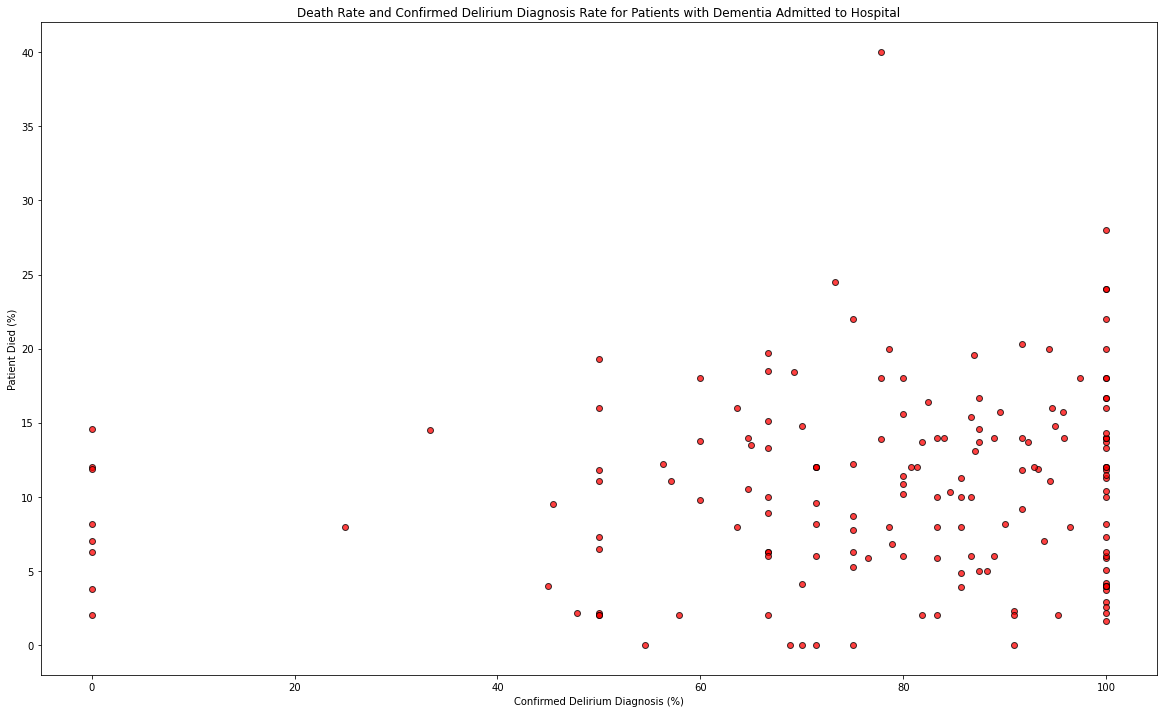

In [53]:
# create plot showing death rate for patients with dementia admitted to hospital
plt.figure(figsize=(20, 12))
plt.scatter(cleaned_hospital_audit_df['Confirmed delirium diagnosis (%)'], cleaned_hospital_audit_df['Patient died (%)'], marker='o', facecolors='red', edgecolors='black', alpha=0.75)
plt.title('Death Rate and Confirmed Delirium Diagnosis Rate for Patients with Dementia Admitted to Hospital')
plt.xlabel('Confirmed Delirium Diagnosis (%)')
plt.ylabel('Patient Died (%)')
plt.show()


In [38]:
# create plot showing death rate for patients with dementia admitted to hospital
cleaned_hospital_audit_df.hvplot.points(x='Presence of any pain (%)', y='Patient died (%)', width=2000, height=1000, title='Death Rate for Patients with Dementia Admitted to Hospital')

:Points   [Presence of any pain (%),Patient died (%)]